# 가설 3: 코로나 이후 온라인 교육으로 인해 학생들의 학습 이해도가 떨어져서 사교육 비중이 증가했다?

- 활용 데이터 : 원격수업 여부․효과성 여부 및 비효율적인 이유 (주된응답, 18세 이하 인구)<br>
https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1SSCV061R&vw_cd=MT_ZTITLE&list_id=B_7_D220&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE

- 추가적으로 해야할 사항
1. 20~21년 학업성취도와 이전 학업성취도와의 비교(20년을 기준점으로 함) => pointplot
2. 사교육비와 학업성취도간의 상관관계 => heatmap
3. 온라인 교육이 학업 성취도에 악영향을 줬다는 확실한 근거 데이터 조사

=> EDA 결과, **성별로 나눠서 분석하는건 의미 없을 것 같다.**

## 로우 데이터 처리

In [206]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [207]:
import koreanize_matplotlib

%config InlineBackend.figure_format = 'retina'

In [208]:
from glob import glob

glob("dataset/원격수업*.csv")

['data\\원격수업_여부․효과성_여부_및_비효율적인_이유__주된응답__18세_이하_인구__20221019104353.csv']

In [209]:
raw = pd.read_csv("dataset\\원격수업_여부․효과성_여부_및_비효율적인_이유__주된응답__18세_이하_인구__20221019104353.csv", encoding="cp949")
raw.shape

(15, 18)

In [210]:
# 대분류 제거
col = raw.iloc[0,:].str.strip()
raw.columns = col
raw

,행정구역별(1),시점,항목,계,동부,읍면부,남자,여자,만족,보통,불만족,100만원 미만,100∼200만원 미만,200∼300만원 미만,300∼400만원 미만,400∼500만원 미만,500∼600만원 미만,600만원 이상
0,행정구역별(1),시점,항목,계,동부,읍면부,남자,여자,만족,보통,불만족,100만원 미만,100∼200만원 미만,200∼300만원 미만,300∼400만원 미만,400∼500만원 미만,500∼600만원 미만,600만원 이상
1,전국,2021,계,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
2,전국,2021,원격수업함,92.0,91.9,92.6,93.3,90.5,92.7,91.7,90.3,83.2,87.7,90.2,92.0,93.0,94.8,92.8
3,전국,2021,- 원격수업 - 효과적이었음,39.3,40.3,33.8,41.9,36.5,44.7,33.7,33.9,23.9,39.4,33.0,39.4,38.6,40.8,43.9
4,전국,2021,- 원격수업 - 효과적이지 않았음,60.7,59.7,66.2,58.1,63.5,55.3,66.3,66.1,76.1,60.6,67.0,60.6,61.4,59.2,56.1
5,전국,2021,? 학교의 원격 수업 환경이 미비,20.9,20.7,21.9,21.8,19.9,22.5,21.2,15.4,14.3,24.8,19.1,24.6,18.0,23.0,19.8
6,전국,2021,? 나의 원격수업 환경이 미비,6.3,6.0,7.6,6.6,6.0,4.9,6.3,10.1,16.8,11.3,13.0,3.8,3.7,3.9,4.3
7,전국,2021,? 수업내용이나 구성이 미흡,19.0,19.2,17.8,20.7,17.2,16.0,23.2,17.6,12.3,14.8,20.7,13.8,20.6,22.4,20.5
8,전국,2021,"? 수업내용이 일률적, 나의 학습능력에 맞지 않음",6.0,5.6,8.0,6.0,5.9,8.1,4.5,3.3,11.9,6.8,2.6,9.6,6.1,7.8,3.3
9,전국,2021,"? 실험, 실습, 대면지도 등이 어려우므로",13.4,13.4,13.6,12.4,14.4,14.1,12.4,13.4,8.7,12.5,16.7,10.8,14.8,11.5,14.2


In [211]:
# 계, 중복행 제거
raw = raw.drop([0,1]).reset_index(drop=True)
raw

,행정구역별(1),시점,항목,계,동부,읍면부,남자,여자,만족,보통,불만족,100만원 미만,100∼200만원 미만,200∼300만원 미만,300∼400만원 미만,400∼500만원 미만,500∼600만원 미만,600만원 이상
0,전국,2021,원격수업함,92.0,91.9,92.6,93.3,90.5,92.7,91.7,90.3,83.2,87.7,90.2,92.0,93.0,94.8,92.8
1,전국,2021,- 원격수업 - 효과적이었음,39.3,40.3,33.8,41.9,36.5,44.7,33.7,33.9,23.9,39.4,33.0,39.4,38.6,40.8,43.9
2,전국,2021,- 원격수업 - 효과적이지 않았음,60.7,59.7,66.2,58.1,63.5,55.3,66.3,66.1,76.1,60.6,67.0,60.6,61.4,59.2,56.1
3,전국,2021,? 학교의 원격 수업 환경이 미비,20.9,20.7,21.9,21.8,19.9,22.5,21.2,15.4,14.3,24.8,19.1,24.6,18.0,23.0,19.8
4,전국,2021,? 나의 원격수업 환경이 미비,6.3,6.0,7.6,6.6,6.0,4.9,6.3,10.1,16.8,11.3,13.0,3.8,3.7,3.9,4.3
5,전국,2021,? 수업내용이나 구성이 미흡,19.0,19.2,17.8,20.7,17.2,16.0,23.2,17.6,12.3,14.8,20.7,13.8,20.6,22.4,20.5
6,전국,2021,"? 수업내용이 일률적, 나의 학습능력에 맞지 않음",6.0,5.6,8.0,6.0,5.9,8.1,4.5,3.3,11.9,6.8,2.6,9.6,6.1,7.8,3.3
7,전국,2021,"? 실험, 실습, 대면지도 등이 어려우므로",13.4,13.4,13.6,12.4,14.4,14.1,12.4,13.4,8.7,12.5,16.7,10.8,14.8,11.5,14.2
8,전국,2021,? 선생님의 지도 없이 학습하기 어려우므로,9.5,9.1,11.7,10.3,8.7,7.9,11.2,10.2,7.4,9.4,8.7,10.2,12.7,11.6,6.3
9,전국,2021,? 학습 이외의 활동을 하게 되는 등 학습에 집중할수 없으므로,18.2,18.8,15.3,15.4,21.0,20.4,14.8,19.8,26.7,13.5,12.3,22.7,16.3,15.7,21.5


In [212]:
raw["항목"] = raw["항목"].str.replace("[-?]", "", regex=True).str.strip()
raw

,행정구역별(1),시점,항목,계,동부,읍면부,남자,여자,만족,보통,불만족,100만원 미만,100∼200만원 미만,200∼300만원 미만,300∼400만원 미만,400∼500만원 미만,500∼600만원 미만,600만원 이상
0,전국,2021,원격수업함,92.0,91.9,92.6,93.3,90.5,92.7,91.7,90.3,83.2,87.7,90.2,92.0,93.0,94.8,92.8
1,전국,2021,원격수업 효과적이었음,39.3,40.3,33.8,41.9,36.5,44.7,33.7,33.9,23.9,39.4,33.0,39.4,38.6,40.8,43.9
2,전국,2021,원격수업 효과적이지 않았음,60.7,59.7,66.2,58.1,63.5,55.3,66.3,66.1,76.1,60.6,67.0,60.6,61.4,59.2,56.1
3,전국,2021,학교의 원격 수업 환경이 미비,20.9,20.7,21.9,21.8,19.9,22.5,21.2,15.4,14.3,24.8,19.1,24.6,18.0,23.0,19.8
4,전국,2021,나의 원격수업 환경이 미비,6.3,6.0,7.6,6.6,6.0,4.9,6.3,10.1,16.8,11.3,13.0,3.8,3.7,3.9,4.3
5,전국,2021,수업내용이나 구성이 미흡,19.0,19.2,17.8,20.7,17.2,16.0,23.2,17.6,12.3,14.8,20.7,13.8,20.6,22.4,20.5
6,전국,2021,"수업내용이 일률적, 나의 학습능력에 맞지 않음",6.0,5.6,8.0,6.0,5.9,8.1,4.5,3.3,11.9,6.8,2.6,9.6,6.1,7.8,3.3
7,전국,2021,"실험, 실습, 대면지도 등이 어려우므로",13.4,13.4,13.6,12.4,14.4,14.1,12.4,13.4,8.7,12.5,16.7,10.8,14.8,11.5,14.2
8,전국,2021,선생님의 지도 없이 학습하기 어려우므로,9.5,9.1,11.7,10.3,8.7,7.9,11.2,10.2,7.4,9.4,8.7,10.2,12.7,11.6,6.3
9,전국,2021,학습 이외의 활동을 하게 되는 등 학습에 집중할수 없으므로,18.2,18.8,15.3,15.4,21.0,20.4,14.8,19.8,26.7,13.5,12.3,22.7,16.3,15.7,21.5


In [213]:
col

행정구역별(1)         행정구역별(1)
시점                     시점
항목                     항목
전체                      계
동·읍면부                  동부
동·읍면부.1               읍면부
성별                     남자
성별.1                   여자
주관적 만족감                만족
주관적 만족감.1              보통
주관적 만족감.2             불만족
가구소득             100만원 미만
가구소득.1       100∼200만원 미만
가구소득.2       200∼300만원 미만
가구소득.3       300∼400만원 미만
가구소득.4       400∼500만원 미만
가구소득.5       500∼600만원 미만
가구소득.6           600만원 이상
Name: 0, dtype: object

In [247]:
df_online = pd.melt(raw, id_vars=["항목","계"], value_vars=col[6:8], var_name="성별", value_name="비율")
df_online

,항목,계,성별,비율
0,원격수업함,92.0,남자,93.3
1,원격수업 효과적이었음,39.3,남자,41.9
2,원격수업 효과적이지 않았음,60.7,남자,58.1
3,학교의 원격 수업 환경이 미비,20.9,남자,21.8
4,나의 원격수업 환경이 미비,6.3,남자,6.6
5,수업내용이나 구성이 미흡,19.0,남자,20.7
6,"수업내용이 일률적, 나의 학습능력에 맞지 않음",6.0,남자,6.0
7,"실험, 실습, 대면지도 등이 어려우므로",13.4,남자,12.4
8,선생님의 지도 없이 학습하기 어려우므로,9.5,남자,10.3
9,학습 이외의 활동을 하게 되는 등 학습에 집중할수 없으므로,18.2,남자,15.4


In [249]:
# numeric 형변환
df_online["계"] = pd.to_numeric(df_online["계"], errors="coerce")
df_online["비율"] = pd.to_numeric(df_online["비율"], errors="coerce")
df_online.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   항목      26 non-null     object 
 1   계       24 non-null     float64
 2   성별      26 non-null     object 
 3   비율      24 non-null     float64
dtypes: float64(2), object(2)
memory usage: 960.0+ bytes


## 온라인 학습 경험 비율
- 2021년 초,중,고등학생 온라인 학습 경험이 92%로 나타남
- 해당 시기의 학업성취도에 영향을 미쳤다고 가정할 수 있음 ?

In [250]:
df_online_per = df_online.loc[df_online["항목"].str.contains("원격수업함|원격수업 안함"), ["항목", "계"]]
df_online_per = df_online_per[df_online_per.duplicated()]
df_online_per

,항목,계
13,원격수업함,92.0
25,원격수업 안함,8.0


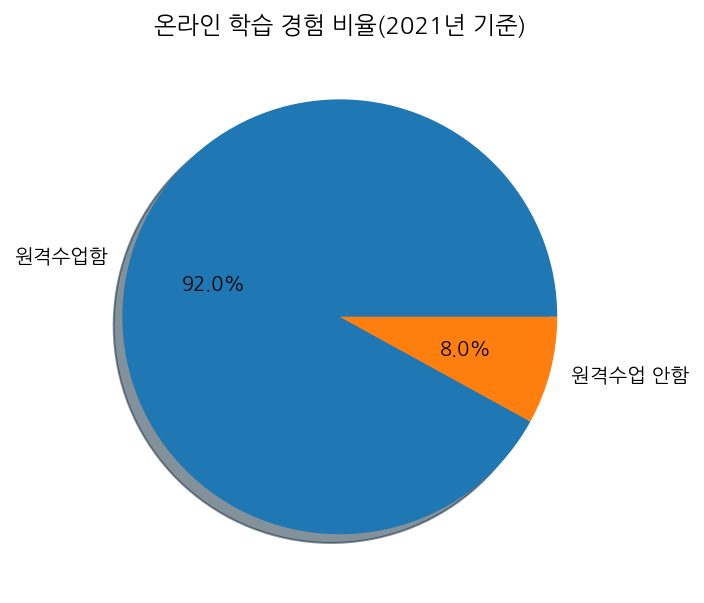

In [251]:
# 파이차트 생성
plt.figure(figsize=(18,5))
plt.pie(df_online_per["계"]
       , labels=df_online_per["항목"]
       , autopct= "%.1f%%"
       , shadow=True)
plt.title("온라인 학습 경험 비율(2021년 기준)")
plt.show()

## 온라인 교육의 효과성 판단 여부(전체, 성별)
- 온라인 교육이 효과적이지 않다고 생각하는 학생이 전체 60.7%

In [252]:
df_effect = df_online[df_online["항목"].str.contains("원격수업  효과적이었음|원격수업  효과적이지 않았음")]
df_effect

,항목,계,성별,비율
1,원격수업 효과적이었음,39.3,남자,41.9
2,원격수업 효과적이지 않았음,60.7,남자,58.1
14,원격수업 효과적이었음,39.3,여자,36.5
15,원격수업 효과적이지 않았음,60.7,여자,63.5


In [253]:
df_effect[df_effect[["항목","계"]].duplicated()]

,항목,계,성별,비율
14,원격수업 효과적이었음,39.3,여자,36.5
15,원격수업 효과적이지 않았음,60.7,여자,63.5


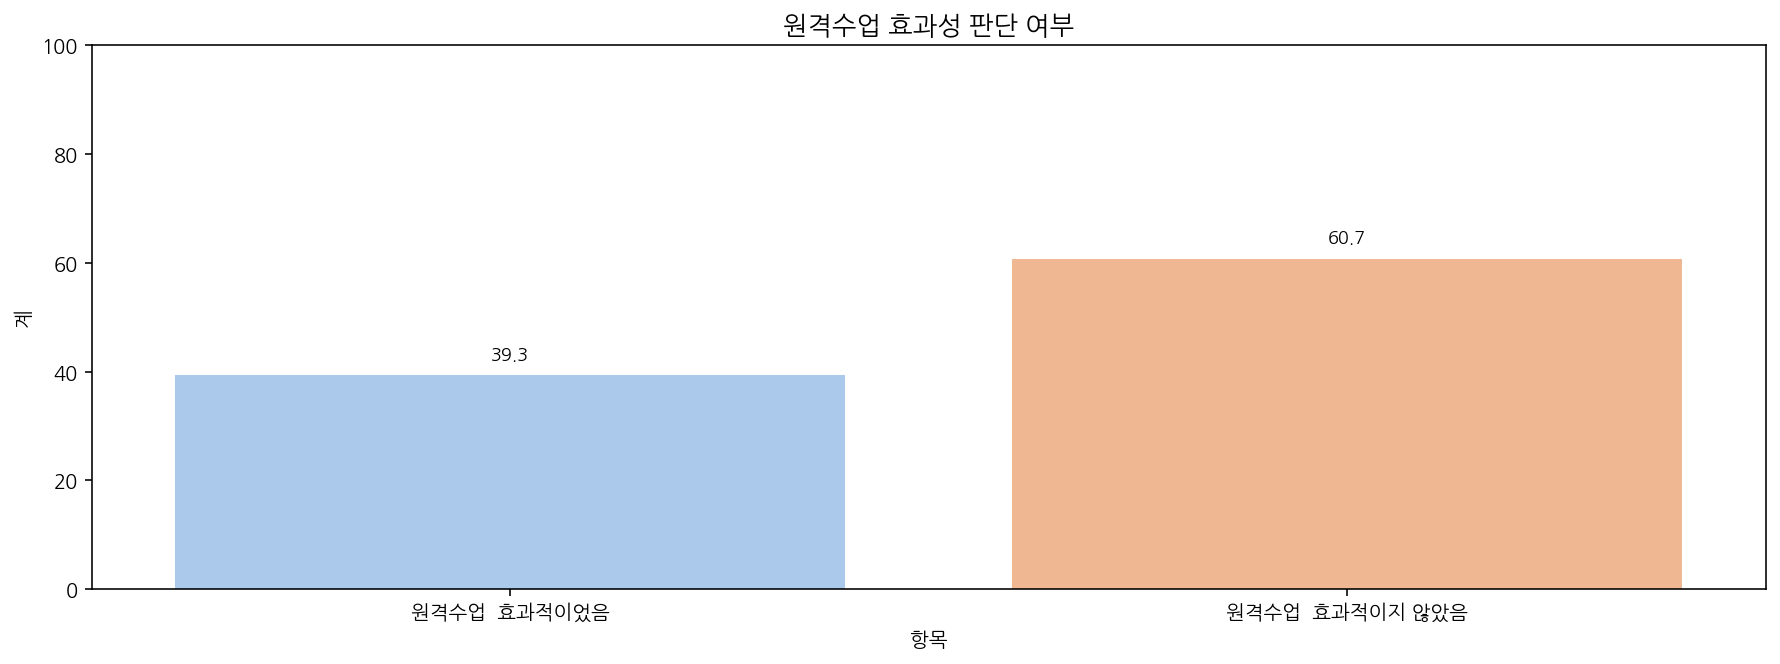

In [258]:
plt.figure(figsize=(15,5))
ef_p_a = sns.barplot(data=df_effect[df_effect[["항목","계"]].duplicated()], x="항목", y="계"
                   , palette = sns.color_palette("pastel"), ci=None)

for p in ef_p_a.patches:
    height = p.get_height()
    ef_p_a.text(p.get_x() + p.get_width() / 2, height + 3, height, ha = 'center', size = 9)

ef_p_a.set_ylim(0, 100)
ef_p_a.set_title("원격수업 효과성 판단 여부", size=13)
plt.show()

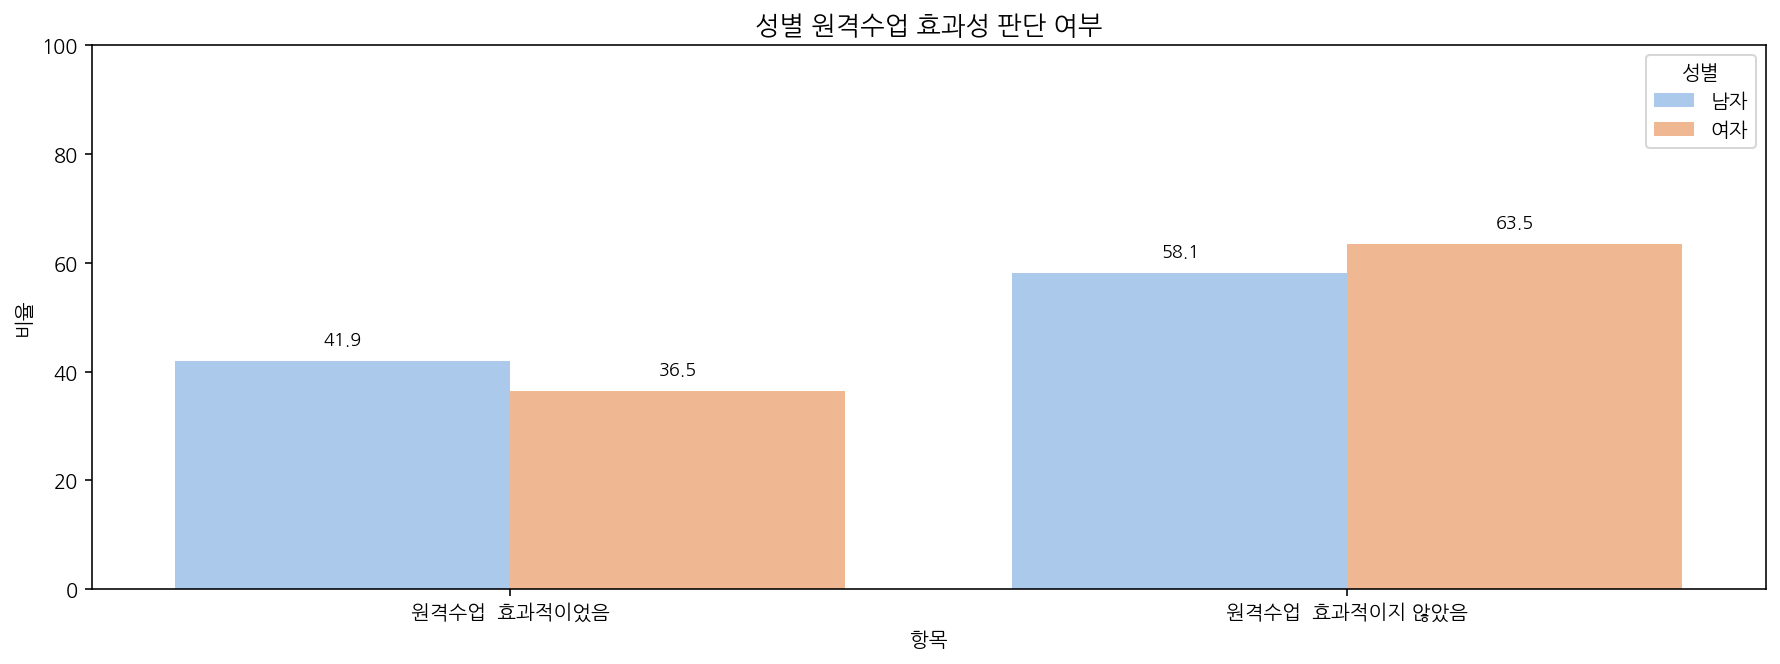

In [261]:
plt.figure(figsize=(15,5))
ef_p = sns.barplot(data=df_effect, x="항목", y="비율", hue="성별"
                   , palette = sns.color_palette("pastel"), ci=None)

for p in ef_p.patches:
    height = p.get_height()
    ef_p.text(p.get_x() + p.get_width() / 2, height + 3, height, ha = 'center', size = 9)
ef_p.set_ylim(0, 100)
ef_p.set_title("성별 원격수업 효과성 판단 여부", size=13)
plt.show()

## 원격수업이 비효율적인 이유(전체, 성별)
- 1위 : 학교 온라인 수업 인프라 문제
- 2위 : 수업 자체의 질 문제
- 3위 : 수업에 집중하기 어려움

In [260]:
df_reason = df_online[~df_online["항목"].str.contains("원격수업함|원격수업  효과적이었음|원격수업  효과적이지 않았음|기타|원격수업 안함")]
df_reason

,항목,계,성별,비율
3,학교의 원격 수업 환경이 미비,20.9,남자,21.8
4,나의 원격수업 환경이 미비,6.3,남자,6.6
5,수업내용이나 구성이 미흡,19.0,남자,20.7
6,"수업내용이 일률적, 나의 학습능력에 맞지 않음",6.0,남자,6.0
7,"실험, 실습, 대면지도 등이 어려우므로",13.4,남자,12.4
8,선생님의 지도 없이 학습하기 어려우므로,9.5,남자,10.3
9,학습 이외의 활동을 하게 되는 등 학습에 집중할수 없으므로,18.2,남자,15.4
10,선생님이나 학우들과의 소통이 어려우므로,6.8,남자,6.8
16,학교의 원격 수업 환경이 미비,20.9,여자,19.9
17,나의 원격수업 환경이 미비,6.3,여자,6.0


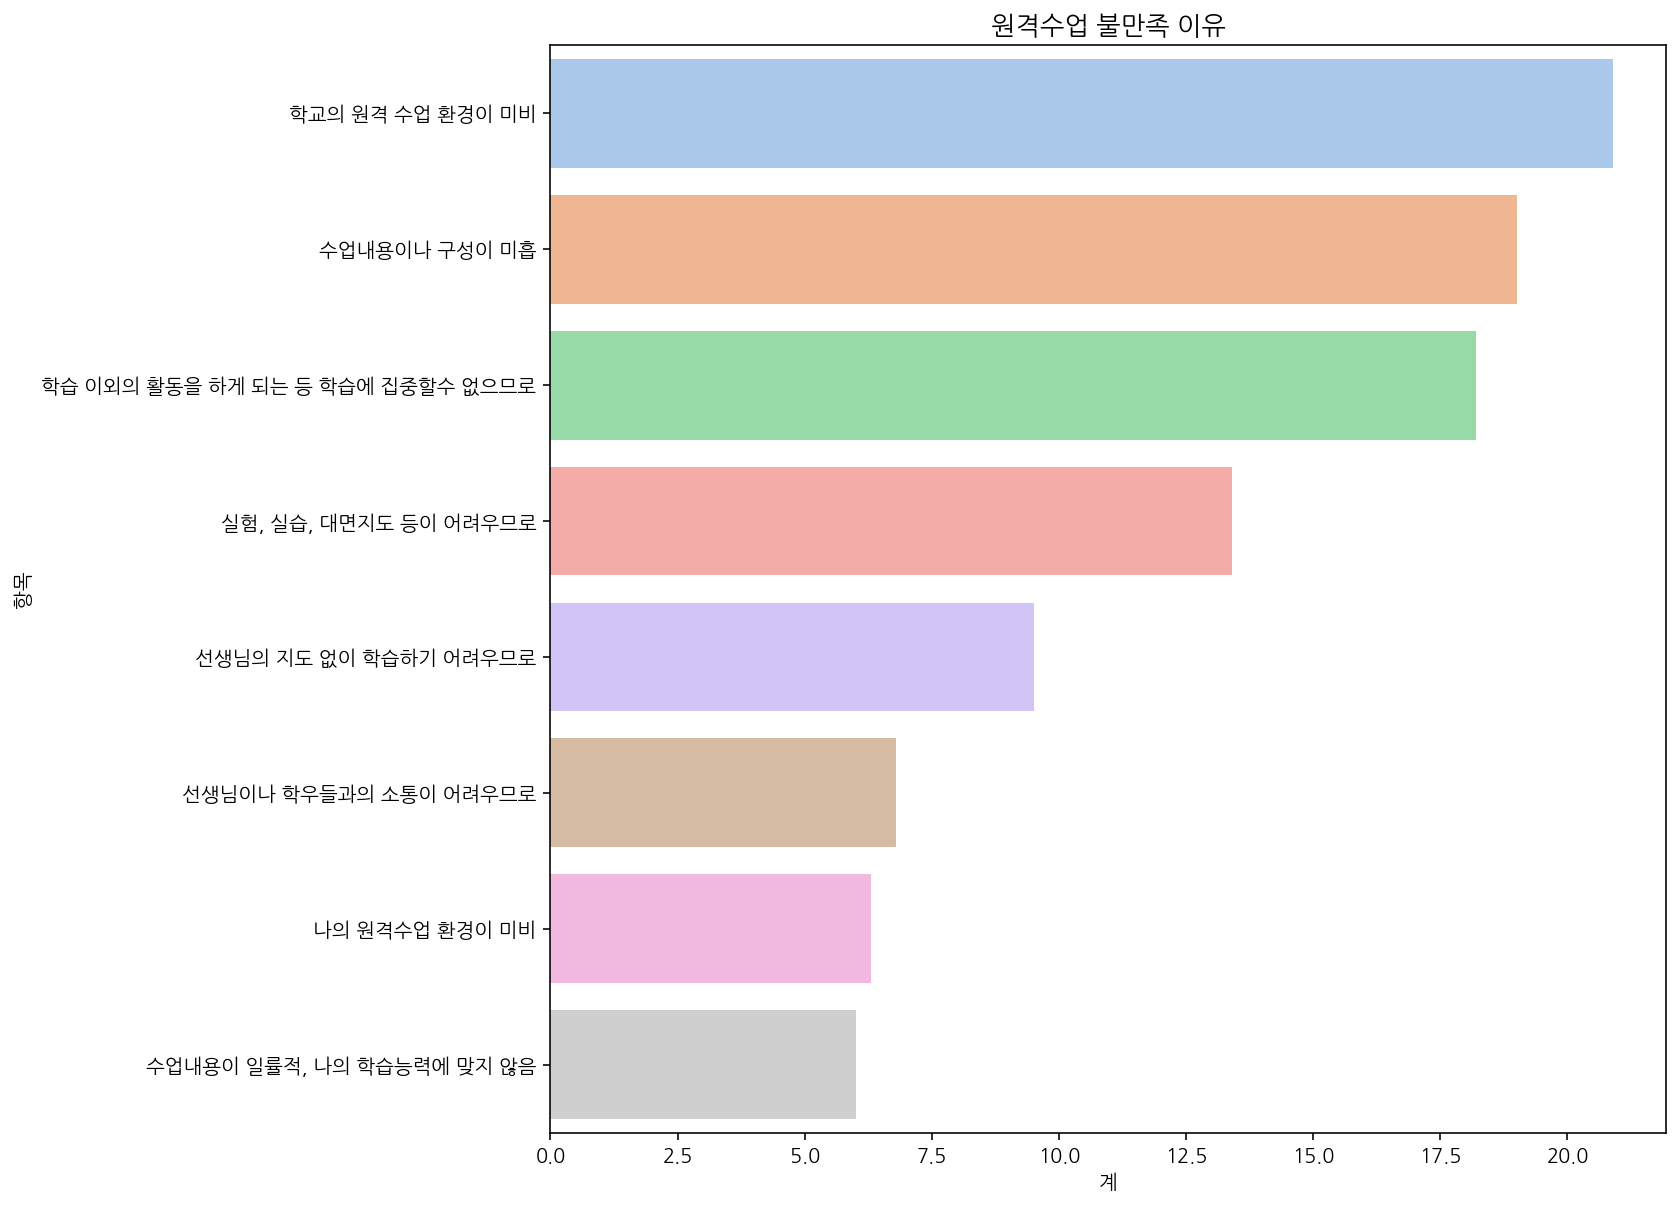

In [273]:
plt.figure(figsize=(10,10))
rs_p_a = sns.barplot(data=df_reason.sort_values(by="계",ascending=False), y="항목", x="계"
                   , palette = sns.color_palette("pastel"), ci=None)

rs_p_a.set_title("원격수업 불만족 이유", size=13)
plt.show()

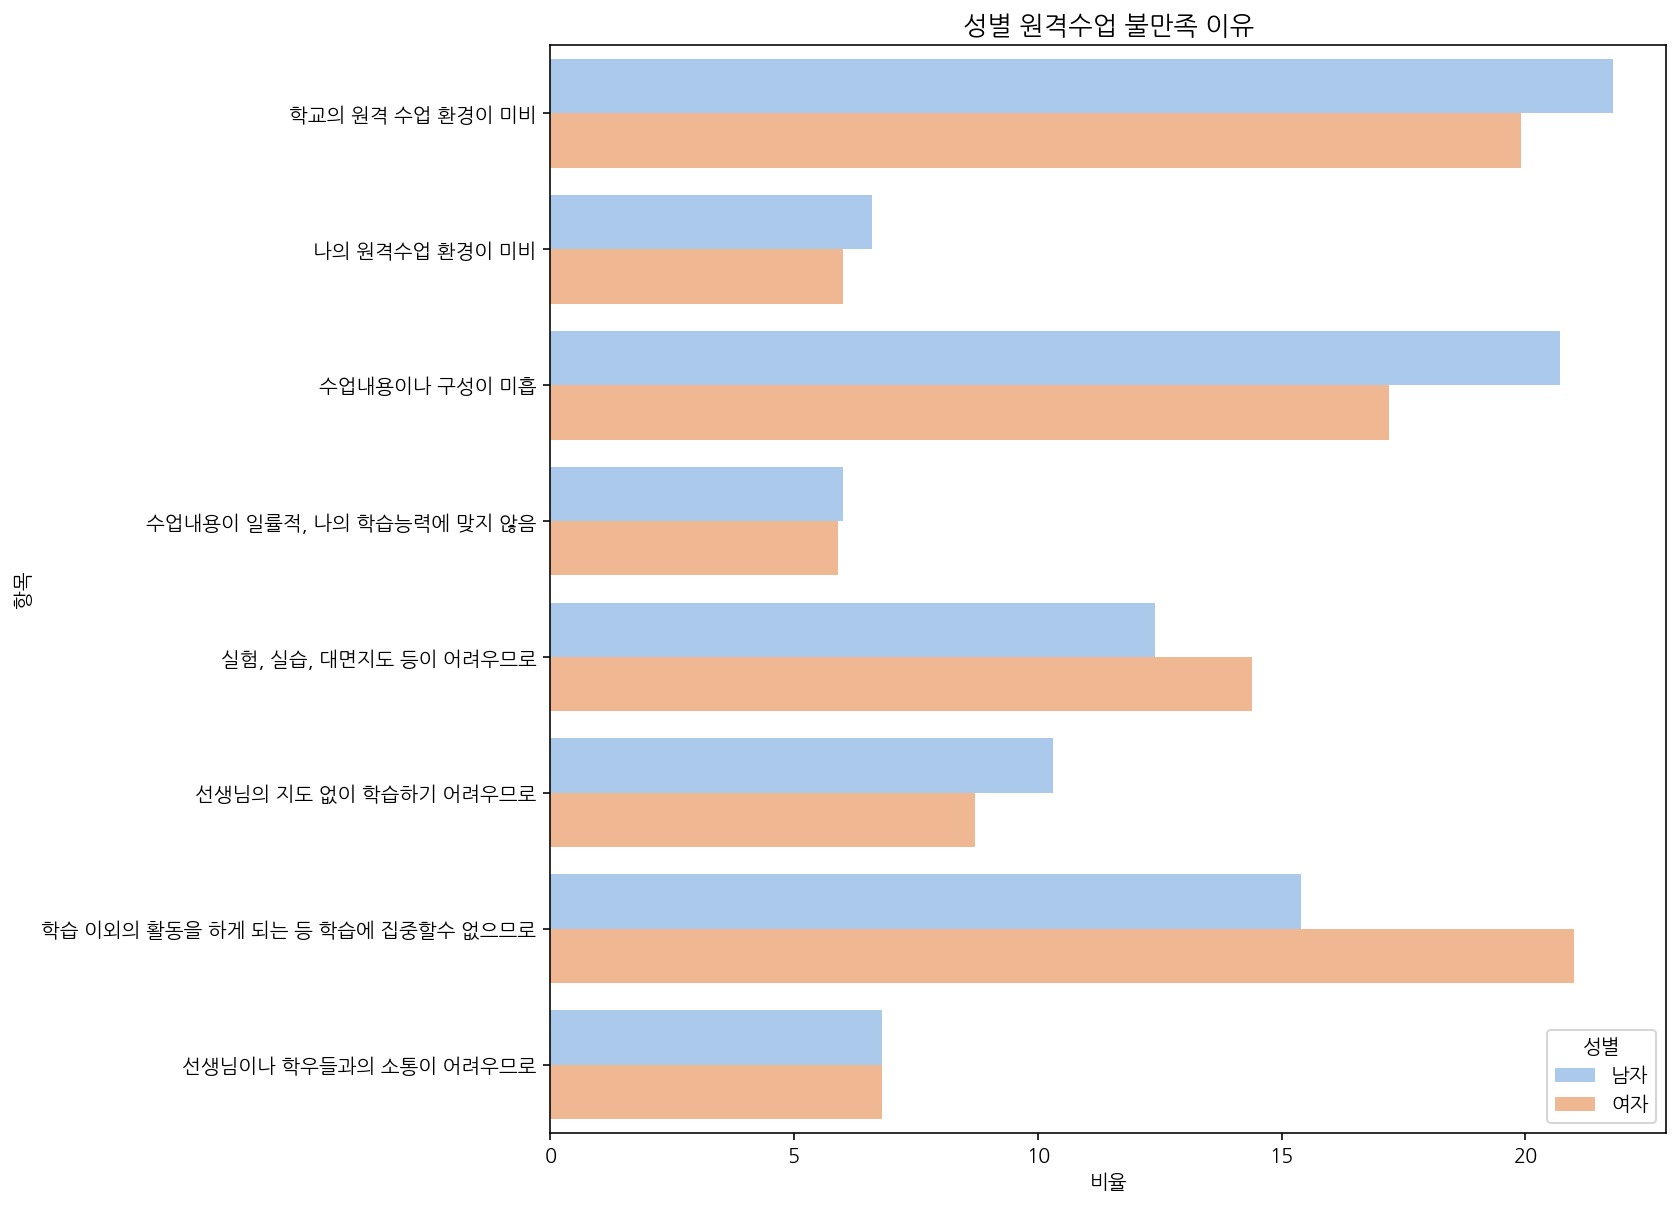

In [262]:
plt.figure(figsize=(10,10))
rs_p = sns.barplot(data=df_reason, y="항목", x="비율", hue="성별"
                   , palette = sns.color_palette("pastel"), ci=None)

rs_p.set_title("성별 원격수업 불만족 이유", size=13)
plt.show()